In [16]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 1. Data

size information : 100 X 100, color channel: 3


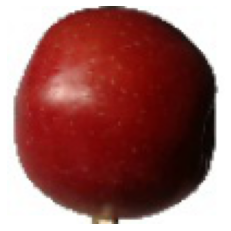

In [116]:
# 1. Data overview
dir_path = "./datas/fruits 360/{}"

ls = os.listdir(dir_path.format("Apple"))
image = mpimg.imread(dir_path.format("Apple/") + ls[0])

width, height, color_channel = image.shape
print("size information : {} X {}, color channel: {}".format(width, height, color_channel))

plt.imshow(image)
plt.axis("off")
plt.show()

In [117]:
# 2. Datas Import
fruits = []
labels = []

class_names = ["Apple", "Banana", "Pineapple"]
for class_name in class_names:
    ls = os.listdir(dir_path.format(class_name))
    
    for file_name in ls:
        image = mpimg.imread(dir_path.format(class_name) + "/{}".format(file_name))
        fruits.append(image)
        labels.append(class_name)
        
fruits = np.array(fruits)
labels = np.array(labels)

data_count, width, height, color_channel = fruits.shape
print("data count : {}".format(data_count))
print("size information : {} X {}, color channel: {}".format(width, height, color_channel))

data count : 1470
size information : 100 X 100, color channel: 3


In [163]:
import tensorflow as tf
from tensorflow import keras
import collections
from sklearn.model_selection import train_test_split

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "./datas/fruits 360",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(100,100),
  batch_size=batch_size)

val_ds 

Found 1470 files belonging to 3 classes.
Using 1176 files for training.


In [141]:
collections.Counter(y_train)

Counter({'Pineapple': 395, 'Banana': 393, 'Apple': 388})

In [142]:
train_ds

<TensorSliceDataset shapes: ((100, 100, 3), ()), types: (tf.uint8, tf.string)>

In [143]:
batch_size = 32
shuffle_buffer_size = 300

train_ds_2 = train_ds.shuffle(shuffle_buffer_size).batch(batch_size)

In [144]:
train_ds_2

<BatchDataset shapes: ((None, 100, 100, 3), (None,)), types: (tf.uint8, tf.string)>

In [145]:
train_ds.shuffle(100)

<ShuffleDataset shapes: ((100, 100, 3), ()), types: (tf.uint8, tf.string)>

In [146]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# 최댓값인 255를 기준으로 표준화 시켜준다.
print(np.min(first_image), np.max(first_image))

0.9568628 1.0


In [157]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "./datas/fruits 360",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(100,100),
  batch_size=batch_size)

Found 1470 files belonging to 3 classes.
Using 1176 files for training.


<BatchDataset shapes: ((None, 100, 100, 3), (None,)), types: (tf.float32, tf.int32)>

In [158]:
num_classes = len(class_names)

model = keras.Sequential([
  keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(height, width, 3), name="normalization"),
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(num_classes)
], name="image_classification")

model.summary()

Model: "image_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Rescaling)   (None, 100, 100, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 50, 50, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 25, 25, 64

In [160]:
# 2. compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [161]:
# 3. model fitting
epochs=10
history = model.fit(
  train_ds,
  epochs=epochs
)

Epoch 1/10
37/37 [==============================] - 4s 96ms/step - loss: 0.1590 - accuracy: 0.9362
Epoch 2/10
37/37 [==============================] - 3s 87ms/step - loss: 1.3340e-05 - accuracy: 1.0000
Epoch 3/10
37/37 [==============================] - 3s 88ms/step - loss: 3.5856e-06 - accuracy: 1.0000
Epoch 4/10
37/37 [==============================] - 4s 97ms/step - loss: 2.3068e-06 - accuracy: 1.0000
Epoch 5/10
37/37 [==============================] - 3s 88ms/step - loss: 1.8730e-06 - accuracy: 1.0000
Epoch 6/10
37/37 [==============================] - 3s 87ms/step - loss: 1.6071e-06 - accuracy: 1.0000
Epoch 7/10
37/37 [==============================] - 4s 95ms/step - loss: 1.3950e-06 - accuracy: 1.0000
Epoch 8/10
37/37 [==============================] - 3s 90ms/step - loss: 1.2691e-06 - accuracy: 1.0000
Epoch 9/10
37/37 [==============================] - 3s 88ms/step - loss: 1.1410e-06 - accuracy: 1.0000
Epoch 10/10
37/37 [==============================] - 4s 94ms/step - loss: 9.7